This tutorial is aimed at making use of simple Dense Layers in- order to show features of keras

It also has features like use of tensorboard and model saving and load

In [199]:
import keras.backend as K
K._backend="tensorflow" if K.backend() else print("NO NEED TO CHANGE BACKEND")

In [200]:
import os
import matplotlib.pyplot as plt

In [201]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import *
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model


In [202]:
#Model Characteristics
nb_class=10
epochs=10
batch=128

In [203]:
#loading dataset
(trainx,trainy),(testx,testy)=mnist.load_data()
print(trainx.shape,trainy.shape,testx.shape,testy.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [204]:
#Preprocessing feature data
trainx=(trainx.reshape(trainx.shape[0],-1).astype("float32"))/255
testx=(testx.reshape(testx.shape[0],-1).astype("float32"))/255

print(trainx.shape,testx.shape)

(60000, 784) (10000, 784)


In [205]:
#pre-processing label data---to be use with pre-caution
trainy=to_categorical(trainy,num_classes=10)
testy=to_categorical(testy,num_classes=10)
print(trainy.shape,testy.shape)

(60000, 10) (10000, 10)


Defining 3 layers Dense Connected Network

In [206]:
def display(img,label=None,flag=False,resize=(28,28)):
    for i in img:
        i=i.reshape(resize)
        plt.imshow(i,cmap='hsv',interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
        plt.grid()
        plt.title(label)
        plt.grid()
        plt.show()

        

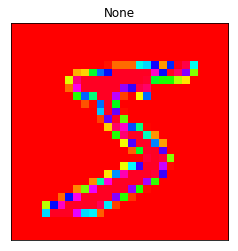

In [209]:
display(trainx[0:1].copy(),resize=(28,28)) # in order to avoid any chance of data modification

In [210]:
#Model // Architecture creation phase
model=Sequential()
model.add(Dense(128,input_shape=(784,),activation='tanh'))
model.add(Dense(64,activation='tanh'))
model.add(Dense(10,input_shape=(784,),activation='softmax'))
tbCallBack =TensorBoard(log_dir='./Graph', histogram_freq=2,  
          write_graph=True, write_images=True)
#Compilation Phase
model.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=["accuracy"])


In [211]:
#Showing Model Structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [217]:
hist=model.fit(trainx,trainy,batch_size=256,epochs=10,validation_split=0.2,verbose=0,callbacks=[tbCallBack])
score=model.evaluate(testx,testy,batch_size=128)
print("Accuracy:{1} \t loss:{0}".format(round(score[0],5),score[1]*100))

10000/10000 [==============================] - 0s 32us/step
Accuracy:92.38 	 loss:0.27625
